In [ ]:
# TESTING COPY OF LTFS

In [85]:
import numpy as np
import pandas as pd

In [86]:
import os
print(os.listdir("E:\Main\File Uploads"))

import matplotlib.pyplot as plt
import seaborn as sns

['.ipynb_checkpoints', '.Rhistory', 'desktop.ini', 'Done', 'JIGSAW Graded Assignment_Loan_Defaulter_03_FEB_2022.ipynb', 'JIGSAW Graded Assignment_Loan_Defaulter_03_FEB_2022.txt', 'Loan Prediction Analysis - Classification.ipynb', 'loan_details_test.csv', 'loan_details_train.csv', 'LTFS Loan Default Prediction.ipynb', 'LTFS testing.ipynb', 'LTFS_test.csv', 'LTFS_train.csv', 'submission.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb']


In [87]:
# reading the data

train = pd.read_csv('E:\Main\File Uploads\loan_details_train.csv')
test = pd.read_csv('E:\Main\File Uploads\loan_details_test.csv')

# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (17486, 20)
Shape of Test : (5829, 19)


In [88]:
# lets look at the head of the train

train.head()

,ID,disbursed_amount,asset_cost,ltv,branch_id,region,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,default
0,18847,51920,69004,78.26,63,South,10-08-1992,Salaried,12-09-2018,1,1,0,0,0,0,796,0,2yrs 0mon,0,0
1,18895,53639,75100,74.57,202,North,09-08-1983,Self employed,12-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,0
2,2986,52503,62415,86.52,67,South,10-10-1985,Self employed,06-08-2018,1,0,0,1,0,0,0,0,0yrs 0mon,0,0
3,1842,49393,66433,76.92,65,South,01-12-1980,Self employed,13-08-2018,1,0,1,1,0,0,825,0,1yrs 10mon,0,0
4,3371,61013,88346,70.86,67,South,01-01-1981,Salaried,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,0


In [89]:
# lets look at the head of the test data

test.head()

,ID,disbursed_amount,asset_cost,ltv,branch_id,region,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,3,55348,66340,85.00,2,East,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,8,51301,61815,85.00,67,South,01-01-1995,Salaried,26-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
2,12,64269,85632,77.07,146,West,15-02-1990,Salaried,24-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,24,56595,71514,84.52,85,West,01-01-1974,Salaried,19-09-2018,1,1,0,0,0,0,825,0,1yrs 4mon,0
4,34,20574,39605,55.55,130,West,09-10-1966,Self employed,09-08-2018,1,1,0,0,0,0,760,0,1yrs 8mon,0


In [90]:
# let's decsribe the train set

train.describe()

,ID,disbursed_amount,asset_cost,ltv,branch_id,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,default
count,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.0,17486.000000,17486.000000,17486.00000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000
mean,11688.575775,54283.477925,75853.423939,74.670285,72.051355,1.0,0.844962,0.075718,0.14240,0.023161,0.002059,294.538488,0.098422,0.209939,0.221206
std,6728.309137,13206.312854,19132.041196,11.479986,69.075311,0.0,0.361952,0.264553,0.34947,0.150420,0.045328,339.235838,0.382010,0.723095,0.415070
min,1.000000,13369.000000,37230.000000,17.130000,1.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5874.250000,47049.000000,65629.000000,68.760000,13.000000,1.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11709.500000,53735.500000,70898.000000,76.760000,61.000000,1.0,1.000000,0.000000,0.00000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
75%,17506.750000,60337.000000,79384.500000,83.600000,130.000000,1.0,1.000000,0.000000,0.00000,0.000000,0.000000,680.000000,0.000000,0.000000,0.000000
max,23315.000000,592460.000000,715186.000000,94.980000,261.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000


In [91]:
# let's describe the test set

test.describe()

,ID,disbursed_amount,asset_cost,ltv,branch_id,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.0,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000
mean,11566.277921,54340.153028,75808.461657,74.795565,72.162978,1.0,0.845428,0.074970,0.137073,0.023160,0.002059,281.324927,0.107223,0.193344
std,6737.232921,12619.694334,18552.919839,11.411243,69.159925,0.0,0.361527,0.263365,0.343954,0.150425,0.045330,336.077732,0.408385,0.625074
min,3.000000,13600.000000,39289.000000,17.360000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5716.000000,46849.000000,65629.000000,68.920000,14.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11462.000000,53803.000000,70991.000000,76.540000,61.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17388.000000,60453.000000,79241.000000,83.720000,120.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,666.000000,0.000000,0.000000
max,23314.000000,144698.000000,225506.000000,94.950000,261.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,870.000000,7.000000,9.000000


In [92]:
# get the info of train

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   17486 non-null  int64  
 1   disbursed_amount                     17486 non-null  int64  
 2   asset_cost                           17486 non-null  int64  
 3   ltv                                  17486 non-null  float64
 4   branch_id                            17486 non-null  int64  
 5   region                               17486 non-null  object 
 6   Date.of.Birth                        17486 non-null  object 
 7   Employment.Type                      16920 non-null  object 
 8   DisbursalDate                        17486 non-null  object 
 9   MobileNo_Avl_Flag                    17486 non-null  int64  
 10  Aadhar_flag                          17486 non-null  int64  
 11  PAN_flag                    

In [93]:
# get the info of test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829 entries, 0 to 5828
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   5829 non-null   int64  
 1   disbursed_amount                     5829 non-null   int64  
 2   asset_cost                           5829 non-null   int64  
 3   ltv                                  5829 non-null   float64
 4   branch_id                            5829 non-null   int64  
 5   region                               5829 non-null   object 
 6   Date.of.Birth                        5829 non-null   object 
 7   Employment.Type                      5625 non-null   object 
 8   DisbursalDate                        5829 non-null   object 
 9   MobileNo_Avl_Flag                    5829 non-null   int64  
 10  Aadhar_flag                          5829 non-null   int64  
 11  PAN_flag                      

In [94]:
# getting the data types of train

train.dtypes

ID                                       int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
region                                  object
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      int64
CREDIT.HISTORY.LENGTH                   object
NO.OF_INQUIRIES                          int64
default                                  int64
dtype: object

In [95]:
# getting the data types of test

test.dtypes

ID                                       int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
region                                  object
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      int64
CREDIT.HISTORY.LENGTH                   object
NO.OF_INQUIRIES                          int64
dtype: object

In [96]:
# checking if there exists any NULL values in the train set

train.isnull().sum()

ID                                       0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
region                                   0
Date.of.Birth                            0
Employment.Type                        566
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
default                                  0
dtype: int64

In [97]:
# checking if there exists any NULL values in the test set

test.isnull().sum()

ID                                       0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
region                                   0
Date.of.Birth                            0
Employment.Type                        204
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
dtype: int64

In [98]:
# checking the values present in the Employement.Type attribute in the train and test sets

train['Employment.Type'].value_counts()

Self employed    9549
Salaried         7371
Name: Employment.Type, dtype: int64

In [99]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment i.e., self employed and salaried
# but the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum().sum())
print("Null values left in the test set:", test.isnull().sum().sum())

Null values left in the train set: 0
Null values left in the test set: 0


In [100]:
# let's save the unique id of the test set and labels set

unique_id = test['ID']
y_train = train.iloc[:, -1]

# let's delete the last column from the dataset to  concat train and test
train = train.drop(['default'], axis = 1)

# shape of train
train.shape

(17486, 19)

In [101]:
# lets concat the train and test sets for preprocessing and visualizations

data = pd.concat([train, test], axis = 0)

# let's check the shape
data.shape

(23315, 19)

In [102]:
# let's check the employement type in the data

data['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Unemployed         770
Name: Employment.Type, dtype: int64

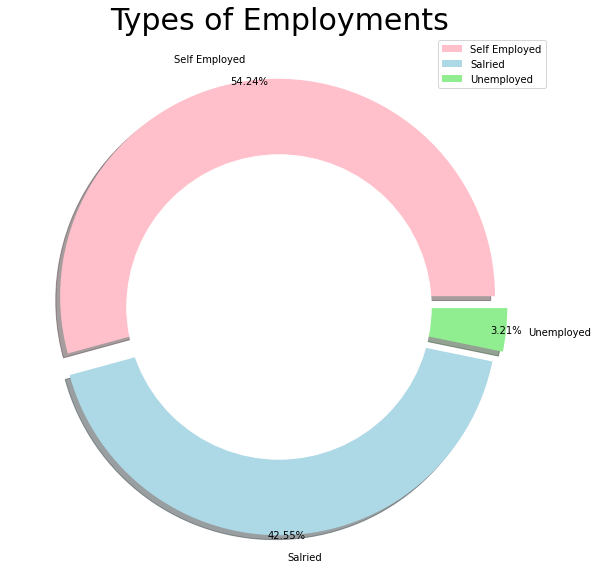

In [103]:
# plotting a donut chart

size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [104]:
# encodings for type of employments

data['Employment.Type'] = data['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
data['Employment.Type'].value_counts()

2    12724
1     9821
0      770
Name: Employment.Type, dtype: int64

In [105]:
# checking the columns names of the data

data.columns

Index(['ID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'region',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES'],
      dtype='object')

In [106]:
#let's check the unique values of ids in different branchs

print("Total no. of Unique Ids :", data['ID'].nunique())
print("Total no. of Unique Branches :", data['branch_id'].nunique())
# print("Total no. of Unique Suppliers :", data['supplier_id'].nunique())
# print("Total no. of Unique Manufactures :", data['manufacturer_id'].nunique())
# print("Total no. of Unique Current pincode Ids :", data['Current_pincode_ID'].nunique())
# print("Total no. of Unique State IDs :",data['State_ID'].nunique())
# print("Total no. of Unique Employee code IDs :", data['Employee_code_ID'].nunique())

Total no. of Unique Ids : 23315
Total no. of Unique Branches : 82


In [107]:
# check the distribution of disbursed amount

    plt.rcParams['figure.figsize'] = (18, 5)

    plt.subplot(1, 3, 1)
    sns.distplot(data['disbursed_amount'],  color = 'orange')
    plt.title('Disburesed Amount')

    plt.subplot(1, 3, 2)
    sns.distplot(data['asset_cost'], color = 'pink')
    plt.title('Asset Cost')

    plt.subplot(1, 3, 3)
    sns.distplot(data['ltv'], color = 'red')
    plt.title('Loan to value of the asset')

    plt.show()

IndentationError: unexpected indent (2983175808.py, line 3)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

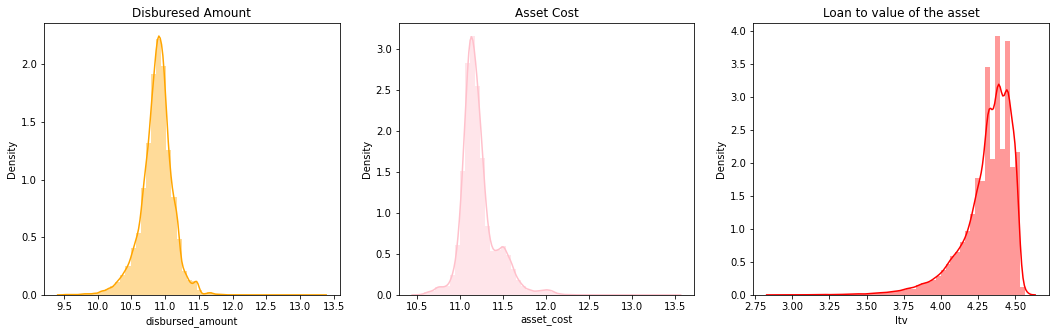

In [108]:
#performing log transformations on disbursed amount, ltv, and asset cost

data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
data['ltv'] = np.log1p(data['ltv'])
data['asset_cost'] = np.log1p(data['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7856\515907016.py:5: UserWarning: Parsing '29-05-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7856\515907016.py:5: UserWarning: Parsing '30-03-1994' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7856\515907016.py:5: UserWarning: Parsing '23-03-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7856\515907016.py:5: UserWarning: Parsing '30-04-1973' in DD/MM/YYYY format. Provide format or specify infer_datetime

Text(0.5, 1.0, 'Distribution of Year of birth')

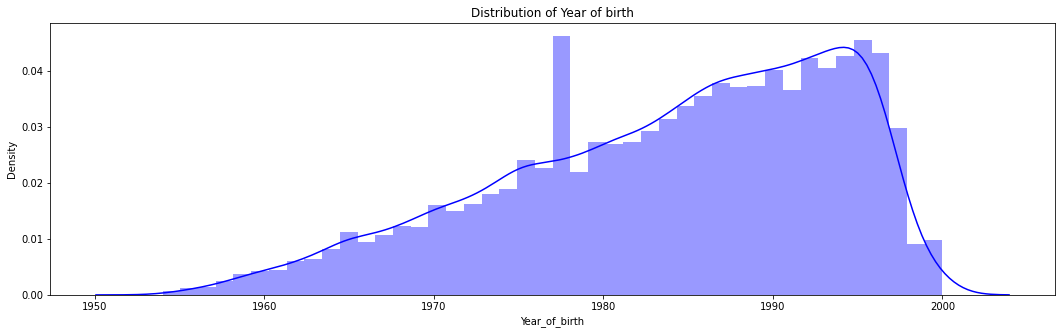

In [109]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format

data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
data['Year_of_birth'] = data['Date.of.Birth'].dt.year

# checking the values inside date of year
sns.distplot(data['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of Inquiries')

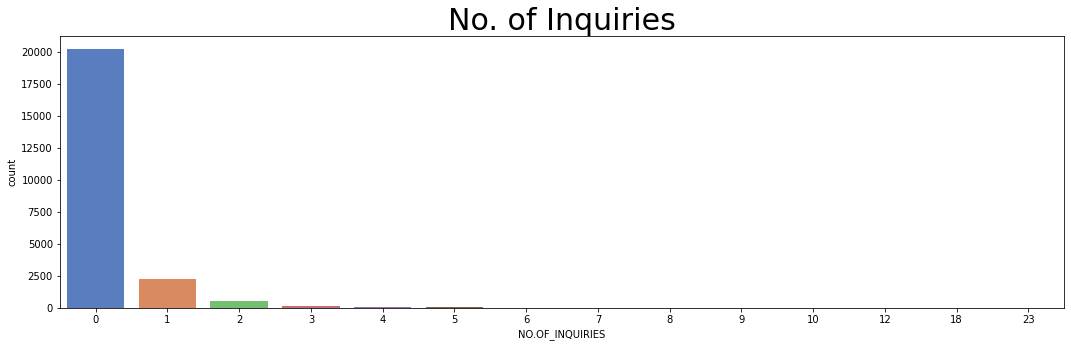

In [110]:
# plotting a countplot

sns.countplot(data['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2yrs 0mon'),
  Text(1, 0, '0yrs 0mon'),
  Text(2, 0, '1yrs 10mon'),
  Text(3, 0, '1yrs 7mon'),
  Text(4, 0, '0yrs 11mon'),
  Text(5, 0, '2yrs 1mon'),
  Text(6, 0, '1yrs 0mon'),
  Text(7, 0, '1yrs 1mon'),
  Text(8, 0, '4yrs 3mon'),
  Text(9, 0, '1yrs 8mon'),
  Text(10, 0, '11yrs 4mon'),
  Text(11, 0, '1yrs 3mon'),
  Text(12, 0, '1yrs 5mon'),
  Text(13, 0, '4yrs 8mon'),
  Text(14, 0, '2yrs 3mon'),
  Text(15, 0, '0yrs 7mon'),
  Text(16, 0, '0yrs 4mon'),
  Text(17, 0, '1yrs 6mon'),
  Text(18, 0, '1yrs 2mon')])

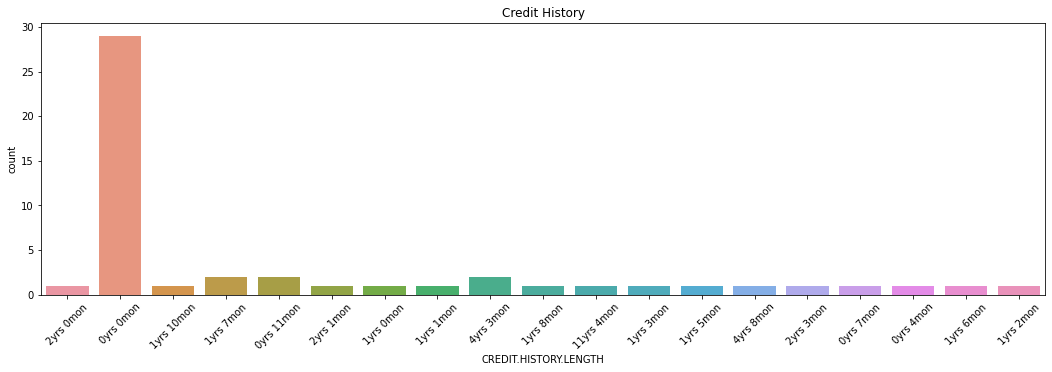

In [111]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0yrs 0mon'),
  Text(1, 0, '1yrs 1mon'),
  Text(2, 0, '0yrs 1mon'),
  Text(3, 0, '3yrs 0mon'),
  Text(4, 0, '10yrs 0mon'),
  Text(5, 0, '1yrs 3mon'),
  Text(6, 0, '3yrs 1mon'),
  Text(7, 0, '0yrs 3mon'),
  Text(8, 0, '1yrs 2mon'),
  Text(9, 0, '2yrs 2mon'),
  Text(10, 0, '2yrs 6mon'),
  Text(11, 0, '5yrs 9mon'),
  Text(12, 0, '3yrs 8mon'),
  Text(13, 0, '0yrs 9mon'),
  Text(14, 0, '4yrs 4mon'),
  Text(15, 0, '2yrs 3mon'),
  Text(16, 0, '0yrs 7mon'),
  Text(17, 0, '0yrs 2mon'),
  Text(18, 0, '0yrs 4mon'),
  Text(19, 0, '1yrs 11mon'),
  Text(20, 0, '0yrs 6mon')])

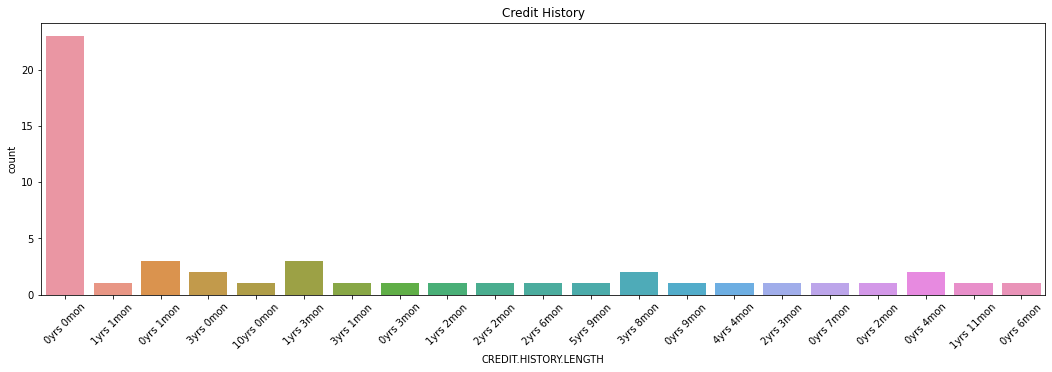

In [112]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [113]:
# changing the credit history format from ayrsbmonths to years 
# as no. of years are more important

data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
#data['CREDIT.HISTORY.LENGTH'].value_counts()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


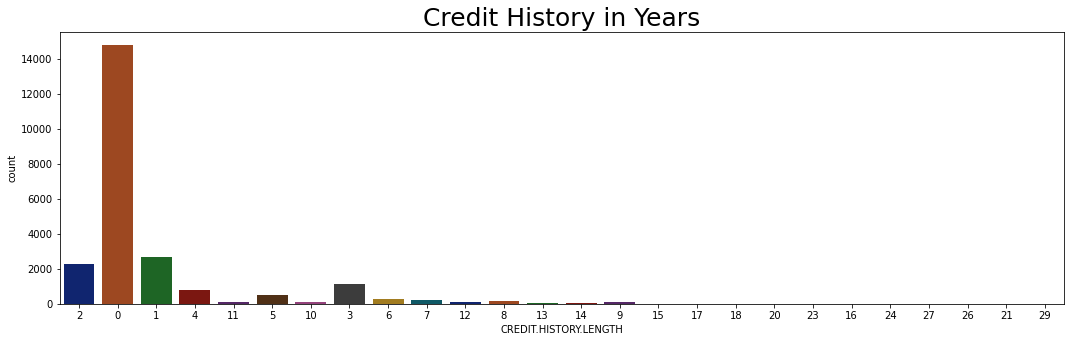

In [114]:
# distribution of credit history years

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

In [115]:
# # average.acct.age i.e., average loan tenure

# sns.countplot(data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
# plt.title('Average Loan Tenure')
# plt.xticks(rotation = 45)

In [116]:
# # average.acct.age i.e., average loan tenure

# sns.countplot(data['AVERAGE.ACCT.AGE'].tail(50), palette = 'colorblind')
# plt.title('Average Loan Tenure')
# plt.xticks(rotation = 45)

In [117]:
# # changing the average account age format from ayrsbmonths to years 
# # as no. of years are more important

# data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
# data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])
# #data['AVERAGE.ACCT.AGE'].value_counts()

In [118]:
# loans defaulted in last six months

data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0    21454
1     1515
2      257
3       62
4       12
5        9
6        4
7        2
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [119]:
# new loans taken by the customer before disbursement

#data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

In [120]:
# # EMI Amount of the Secondary Plan

# plt.subplot(1, 2, 1)
# sns.distplot(data['SEC.INSTAL.AMT'])
# plt.title('EMI Amount Secondary Plan', fontsize = 20)
# plt.xticks(rotation = 45)

# plt.subplot(1, 2, 2)
# sns.distplot(data['PRIMARY.INSTAL.AMT'])
# plt.title('EMI Amount Primary Plan', fontsize = 20)
# plt.xticks(rotation = 45)

# plt.show()

In [121]:
# # let's apply log transformations on EMI Amount of the Primary Loan and Secondary loan

# data['PRIMARY.INSTAL.AMT'] = np.log1p(data['PRIMARY.INSTAL.AMT'])
# data['SEC.INSTAL.AMT'] = np.log1p(data['SEC.INSTAL.AMT'])

# plt.subplot(1, 2, 1)
# sns.distplot(data['SEC.INSTAL.AMT'], color = 'yellow')
# plt.title('EMI Amount Secondary Plan', fontsize = 20)
# plt.xticks(rotation = 45)

# plt.subplot(1, 2, 2)
# sns.distplot(data['PRIMARY.INSTAL.AMT'],color = 'yellow')
# plt.title('EMI Amount Primary Plan', fontsize = 20)
# plt.xticks(rotation = 45)

# plt.show()

In [122]:
# # distribution for different attributesof secondary accounts


# plt.rcParams['figure.figsize'] = (18, 12)    
# plt.subplot(2, 3, 1)
# sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'green')
# plt.title('Total loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 2)
# sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'green')
# plt.title('Active loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 3)
# sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'green')
# plt.title('Default Accounts at the time of disbursement')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 4)
# sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'green')
# plt.title('Principal Outstanding amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 5)
# sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'green')
# plt.title('Total Sanctioned Amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 6)
# sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'green')
# plt.title('Total Disbured Amount')
# plt.xticks(rotation = 45)

In [123]:
# # applying log transformation to all these attributes

# data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
# data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
# data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
# #data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
# data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
# data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

# #  filling  missing values in sec.current.balance
# data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [124]:

# plt.rcParams['figure.figsize'] = (18, 12)    
# plt.subplot(2, 3, 1)
# sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'red')
# plt.title('Total loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 2)
# sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'red')
# plt.title('Active loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 3)
# sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'red')
# plt.title('Default Accounts')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 4)
# sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'red')
# plt.title('Principal Outstanding amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 5)
# sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'red')
# plt.title('Total Sanctioned Amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 6)
# sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'red')
# plt.title('Total Disbured Amount')
# plt.xticks(rotation = 45)

# plt.show()

In [125]:
# #  applying log transformations to the primary account attributes

# data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
# data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
# data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
# #data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
# #data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
# data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])


# #  filling  missing values in sec.current.balance
# data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)
# data['PRI.SANCTIONED.AMOUNT'].fillna(data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)

In [126]:
# # plotting distribution plots for these attributes

# plt.rcParams['figure.figsize'] = (18, 12)    
# plt.subplot(2, 3, 1)
# sns.distplot(data['PRI.NO.OF.ACCTS'], color = 'violet')
# plt.title('Total loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 2)
# sns.distplot(data['PRI.ACTIVE.ACCTS'], color = 'violet')
# plt.title('Active loan taken by customer')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 3)
# sns.distplot(data['PRI.OVERDUE.ACCTS'], color = 'violet')
# plt.title('Default Accounts')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 4)
# sns.distplot(data['PRI.CURRENT.BALANCE'], color = 'violet')
# plt.title('Principal Outstanding amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 5)
# sns.distplot(data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
# plt.title('Total Sanctioned Amount')
# plt.xticks(rotation = 45)

# plt.subplot(2, 3, 6)
# sns.distplot(data['PRI.DISBURSED.AMOUNT'], color = 'violet')
# plt.title('Total Disbured Amount')
# plt.xticks(rotation = 45)

# plt.show()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


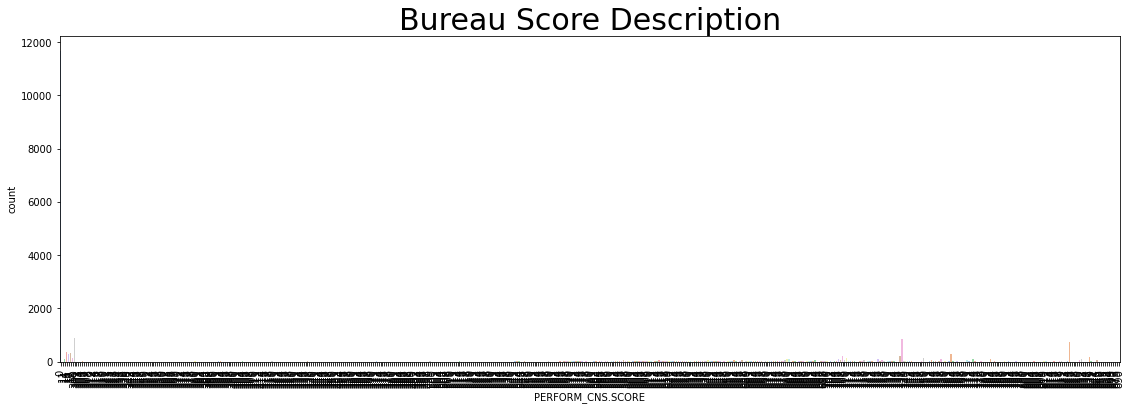

In [127]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(data['PERFORM_CNS.SCORE'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [128]:
# checking the perform cns score description

data['PERFORM_CNS.SCORE'].value_counts()

0      11658
300      882
738      872
825      725
15       375
       ...  
304        1
343        1
518        1
360        1
395        1
Name: PERFORM_CNS.SCORE, Length: 537, dtype: int64

In [129]:
# # encodings for bureau score(perform cns score distribution)

# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
# data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# # checing the values in bureau score
# data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


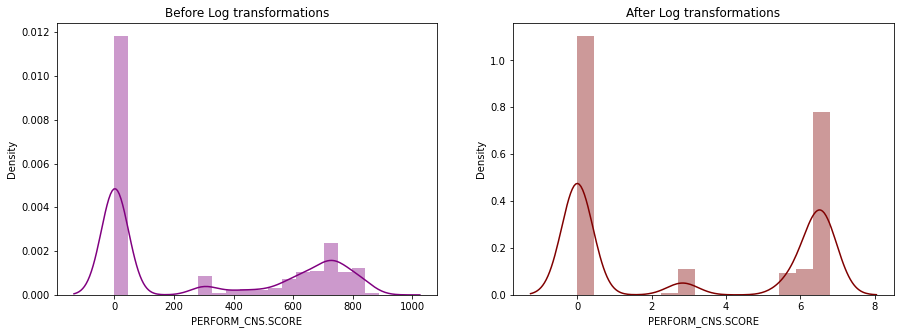

In [130]:
# checking the bureau score

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'purple')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
data['PERFORM_CNS.SCORE'] = np.log1p(data['PERFORM_CNS.SCORE'])
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'maroon')
plt.title('After Log transformations')

plt.show()

In [131]:
# customer has passport or not

data['Passport_flag'].value_counts()

0    23267
1       48
Name: Passport_flag, dtype: int64

In [132]:
# customer has driving license or not

data['Driving_flag'].value_counts()

0    22775
1      540
Name: Driving_flag, dtype: int64

In [133]:
# customer has voter-id card or not

data['VoterID_flag'].value_counts()

0    20026
1     3289
Name: VoterID_flag, dtype: int64

In [134]:
# customer has pan card or not

data['PAN_flag'].value_counts()

0    21554
1     1761
Name: PAN_flag, dtype: int64

In [135]:
# customer has aadhar card or not

data['Aadhar_flag'].value_counts()

1    19703
0     3612
Name: Aadhar_flag, dtype: int64

In [136]:
# customer has shared the mobile no. or not

data['MobileNo_Avl_Flag'].value_counts()

1    23315
Name: MobileNo_Avl_Flag, dtype: int64

In [137]:
# lets extract features from disbursal dates
# as all  the disbursement dates are of year 2018 so we can extract the months

data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
data['DisbursalMonth'] = data['DisbursalDate'].dt.month

data['DisbursalMonth'].value_counts()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-08-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-08-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-10-2018' in DD/MM/YYYY format. Provide format or s

10    8422
8     5730
9     5507
6      624
11     623
12     565
3      518
4      488
7      390
5      277
1      170
2        1
Name: DisbursalMonth, dtype: int64

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


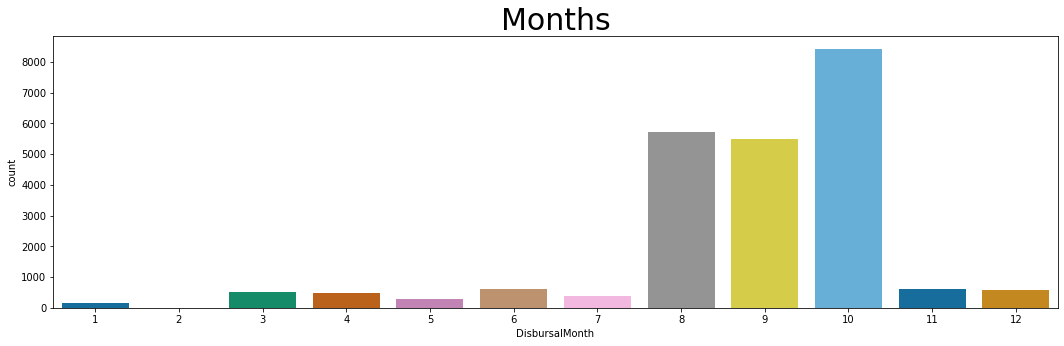

In [138]:
# plotting the Disbursal date

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)
plt.show()

In [139]:
# # some attributes are categorical but they are in integer so let's convert them into category

# data['branch_id'] = data['branch_id'].astype('category')
# data['manufacturer_id'] = data['manufacturer_id'].astype('category')
# data['State_ID'] = data['State_ID'].astype('category')

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['branch_id'] = le.fit_transform(data['branch_id'])
# data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
# data['State_ID'] = le.fit_transform(data['State_ID'])

# # checking the values in these attributes
# #data['branch_id'].value_counts()
# #data['manufacturer_id'].value_counts()
# #data['State_ID'].value_counts()

In [140]:
# removing unnecassary columns

data = data.drop(['ID', 'region', 'Date.of.Birth', 'DisbursalDate'], axis = 1)

# checking the new columns of data
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'Employment.Type',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH',
       'NO.OF_INQUIRIES', 'Year_of_birth', 'DisbursalMonth'],
      dtype='object')

In [141]:
# looking at the sample of the pre-processed data

data.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth,DisbursalMonth
9576,10.968164,11.523173,4.117084,120,1,1,0,0,1,0,0,5.961005,2,12,0,1962,10
1095,11.203843,11.558759,4.324265,11,2,1,0,0,1,0,0,0.000000,0,0,0,1994,10
2783,10.418853,10.742746,4.338728,3,2,1,1,1,0,0,0,6.001415,3,8,0,1978,3
10280,10.804746,11.129466,4.347694,5,1,1,1,1,0,0,0,0.000000,0,0,0,1997,8
4496,10.750342,11.146662,4.251776,165,1,1,1,0,0,0,0,0.000000,0,0,0,1977,9


In [142]:
# checking the target variable

y_train.value_counts()

0    13618
1     3868
Name: default, dtype: int64

In [143]:
# there is a big difference in the no. of values for 1 and 0
# so we can apply SMOTE or over-sampling
# that means replicating the samples of 1 to lessen the parity between 0 and 1 values

# lets install imblearn
#!pip install -U imbalanced-learn

In [144]:
# separating train and test datasets from data

x_train = data.iloc[:17486,:]
x_test = data.iloc[17486:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (17486, 17)
Shape of test : (5829, 17)


In [145]:
# applying SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(x_train, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (27236, 17)
Shape of y: (27236,)


In [146]:

# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(21788, 17)
(21788,)
(5448, 17)
(5448,)


In [147]:
# applying standardization

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Training Accuracy:  0.9999541031760603
Testing Accuarcy:  0.7639500734214391
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2689
           1       0.78      0.75      0.76      2759

    accuracy                           0.76      5448
   macro avg       0.76      0.76      0.76      5448
weighted avg       0.76      0.76      0.76      5448



<AxesSubplot:>

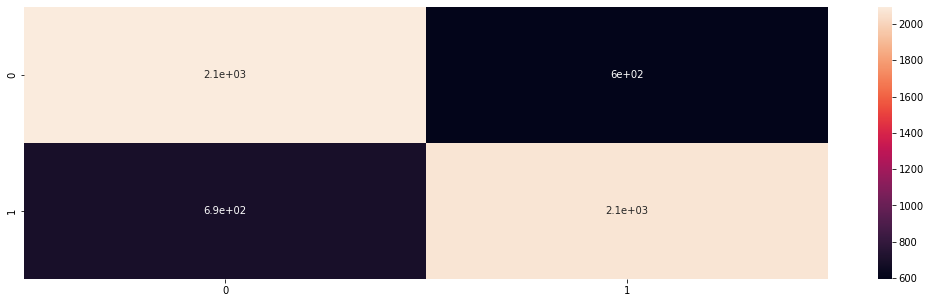

In [148]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [149]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7088518032618322


(0.0, 1.0)

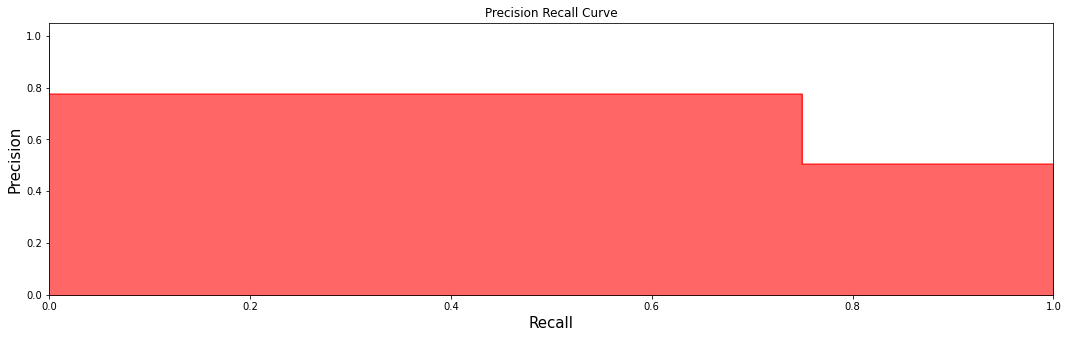

In [150]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.6672480264365706
Testing Accuarcy:  0.6556534508076358
              precision    recall  f1-score   support

           0       0.66      0.61      0.64      2689
           1       0.65      0.70      0.67      2759

    accuracy                           0.66      5448
   macro avg       0.66      0.66      0.65      5448
weighted avg       0.66      0.66      0.66      5448



<AxesSubplot:>

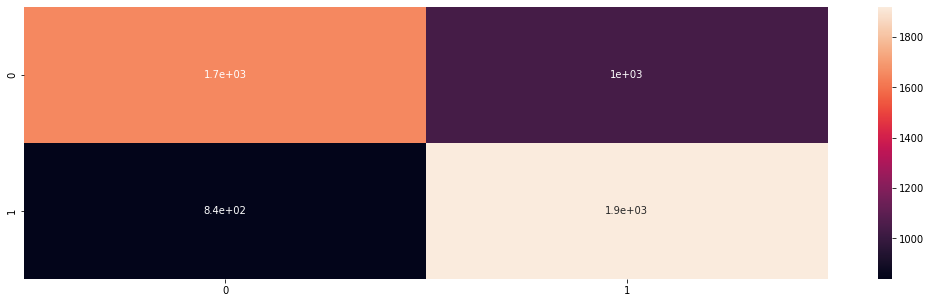

In [151]:
# ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [152]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.6058753215476418


(0.0, 1.0)

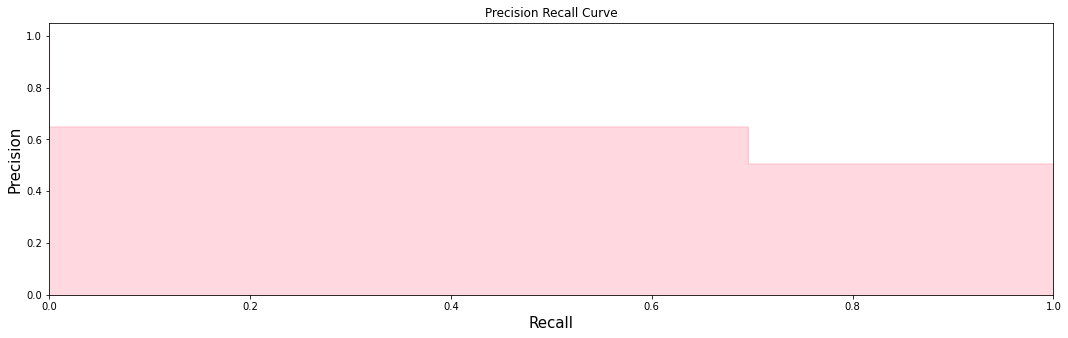

In [153]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8575821553148522
Testing Accuarcy:  0.7321953010279001
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2689
           1       0.74      0.73      0.73      2759

    accuracy                           0.73      5448
   macro avg       0.73      0.73      0.73      5448
weighted avg       0.73      0.73      0.73      5448



<AxesSubplot:>

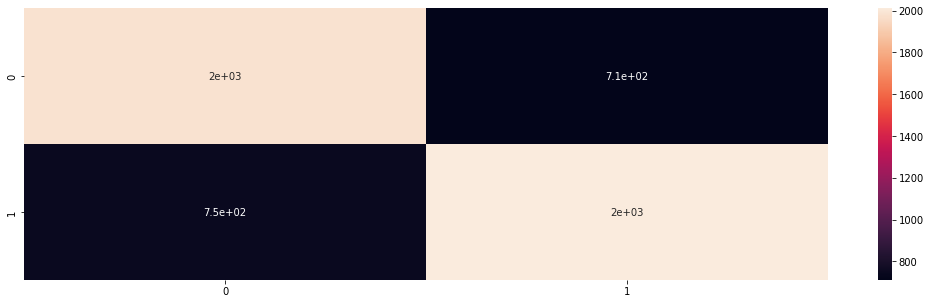

In [154]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [155]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.6757527360729456


(0.0, 1.0)

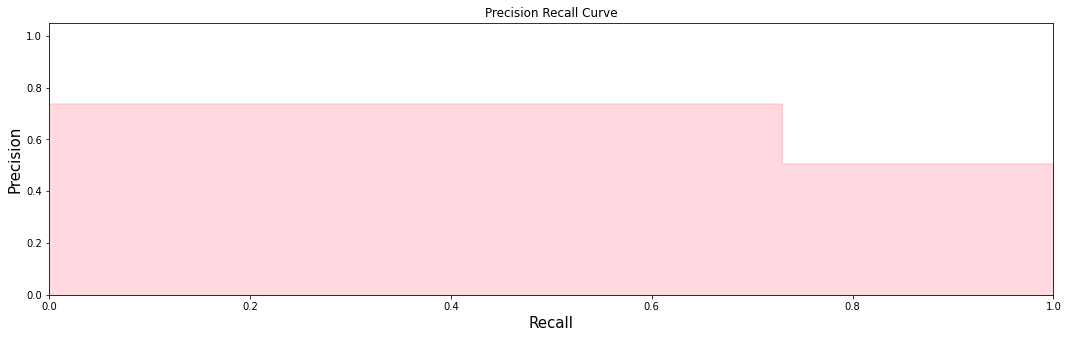

In [156]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.7806590783917753
Testing Accuarcy:  0.7233847283406755
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2689
           1       0.74      0.69      0.72      2759

    accuracy                           0.72      5448
   macro avg       0.72      0.72      0.72      5448
weighted avg       0.72      0.72      0.72      5448



<AxesSubplot:>

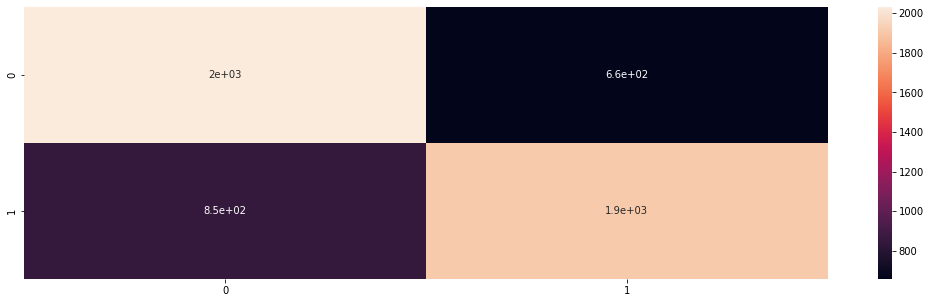

In [157]:
# light boost classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(x_train, y_train)

y_pred = model_lgb.predict(x_valid)

print("Training Accuracy: ", model_lgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [158]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.6707335931959788


(0.0, 1.0)

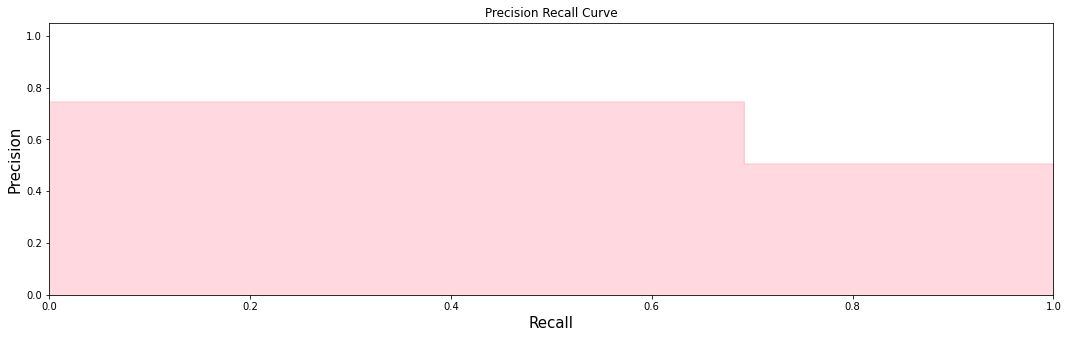

In [159]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

<AxesSubplot:ylabel='name'>

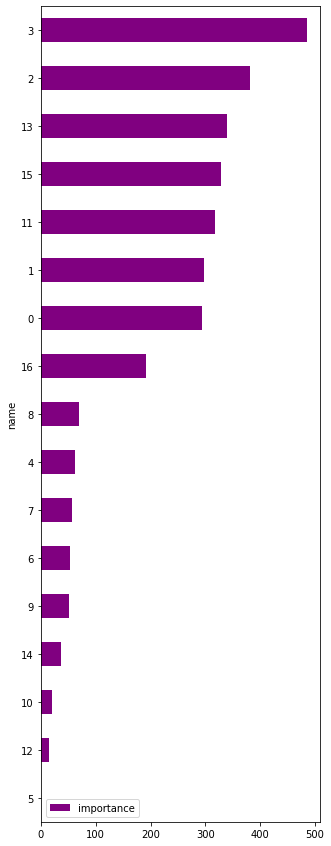

In [160]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

In [77]:
# let's predict for the tests set

y_pred_rf = model_rf.predict(x_test)
y_pred_ada = model_ada.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_lgb = model_lgb.predict(x_test)

In [78]:
# Boosting
# as random forest and lgboost performed better than adaboost and xgboost
# so we prefer to give lgbbost and randomforest more importance

predictions = y_pred_rf*0.3 + y_pred_ada*0.2 + y_pred_xgb*0.2 + y_pred_xgb*0.3

In [79]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgb})

#Visualize the first 5 rows
submission.head()

,UniqueID,loan_default
0,3,0
1,8,0
2,12,1
3,24,0
4,34,0


In [82]:
submission

,UniqueID,loan_default
0,3,0
1,8,0
2,12,1
3,24,0
4,34,0
...,...,...
5824,23294,1
5825,23295,0
5826,23298,0
5827,23299,0


In [84]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
#filename = 'submission.csv'

# submission.to_csv(submission.csv,index=False)

# print('Saved file: ' + submission.csv)

submission.to_csv('submission.csv')